   taille   poid
0    1.50  49.67
1    1.51  51.97
2    1.52  54.05
3    1.54  53.49
4    1.55  53.64


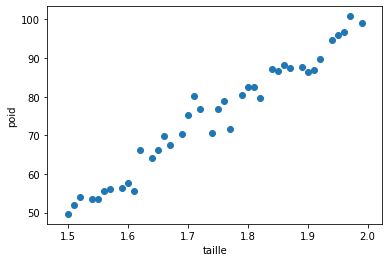

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

df = pd.read_csv('csv/1.csv')
print(df.head())
plt.scatter(df['taille'],df['poid'])
plt.xlabel('taille')
plt.ylabel('poid')
plt.show()

In [3]:
from numpy.linalg import inv
df['const'] = 1 
X = df[['taille','const']]
y = df['poid']
estim = np.dot(np.dot(inv(np.dot(X.transpose(),X)),X.transpose()),y)
print(estim)

[100.1946027 -99.8155952]


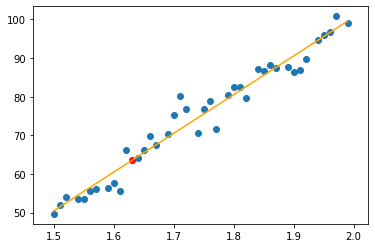

In [4]:
plt.scatter(df['taille'],df['poid'])
plt.plot(df['taille'],np.dot(df[['taille','const']].values,estim),c='orange')
plt.scatter(1.63,np.dot([1.63,1],estim),c='red')
plt.show()

   superficie  region        prix
0         9.0       4  137.201327
1         9.1       1  128.630484
2         9.2       2  127.932689
3         9.3       3  133.779443
4         9.4       1  128.724906


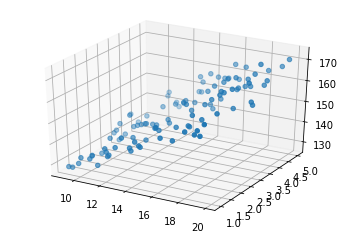

In [5]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('csv/2.csv')
print(df.head())
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df['superficie'], df['region'], df['prix'])
plt.show()


In [6]:
z = df['prix'].values
df['const'] = 1 
X = df[['superficie','region','const']].values
estim = np.dot(np.dot(inv(np.dot(X.transpose(),X)),X.transpose()),z)
print(estim)

[ 3.05789975  2.17383791 98.9440926 ]


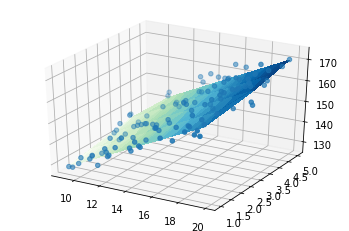

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df['superficie'], df['region'], df['prix'])
ax.plot_trisurf(df['superficie'],df['region'],np.dot(X,estim),cmap='GnBu',antialiased=False)
plt.show()

In [8]:
df = pd.read_csv('csv/3.csv')
print(df.head())

          x         y         z          d
0  4.796127 -2.924835 -2.889062  11.497467
1  5.275970 -1.214218 -1.301724  12.349034
2  0.124201  1.641086  1.735463   4.560645
3  0.161535  5.533363  5.474890   4.901365
4  4.290574 -2.205118 -2.171698  10.346847


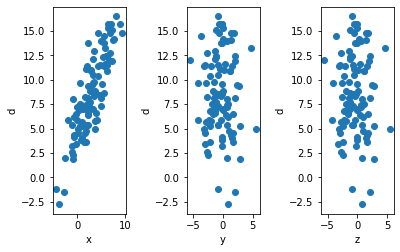

In [9]:
fig,ax = plt.subplots(1,3)
fig.tight_layout(pad=3.0)
for i,v in enumerate(['x','y','z']):
    plt.subplot(1,3,i+1)
    plt.scatter(df[v],df['d'])
    plt.xlabel(v)
    plt.ylabel('d')
plt.show()

In [10]:
df['const'] = 1 
X = df[['x','y','z','const']].values 
estim = np.dot(np.dot(inv(np.dot(X.transpose(),X)),X.transpose()),df['d'])
print(estim)

[ 1.22602454 -2.47467122  2.50154986  4.96772067]


In [11]:
df[['x','y','z']] = (df[['x','y','z']] - df[['x','y','z']].mean() ) /df[['x','y','z']].std()
print(df.describe())

                  x             y             z           d  const
count  1.000000e+02  1.000000e+02  1.000000e+02  100.000000  100.0
mean   7.965850e-17 -4.163336e-18  1.387779e-17    8.507191    1.0
std    1.000000e+00  1.000000e+00  1.000000e+00    4.141098    0.0
min   -2.519218e+00 -2.697245e+00 -2.730475e+00   -2.738593    1.0
25%   -7.151548e-01 -6.004915e-01 -6.249559e-01    5.601078    1.0
50%    1.153722e-02  3.355124e-03 -3.501829e-02    8.242774    1.0
75%    7.434830e-01  6.296179e-01  6.356524e-01   11.544204    1.0
max    2.223793e+00  3.176321e+00  3.116674e+00   16.463345    1.0


In [12]:
X = df[['x','y','z','const']].values 
lambd=5
estim = np.dot(np.dot(inv(np.dot(X.transpose(),X) + lambd*np.identity(4)),X.transpose()),df['d'])
print(estim)

[ 3.37294433 -0.07101571  0.15266806  8.1020866 ]


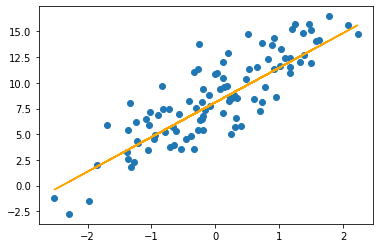

In [13]:
plt.scatter(df['x'],df['d'])
plt.plot(df['x'],estim[0]*df['x']+estim[-1],color='orange')
plt.show()